# Early diagnosis of diabetes

# Objective

The objective of this project is to diagnostically predict whether a patient has diabetes based on
certain diagnostic measurements included in the dataset.

Description of this dataset:-

Pregnancies: To express the Number of pregnancies.

Glucose: To express the Glucose level in blood.

BloodPressure: To express the Blood pressure measurement.

SkinThickness: To express the thickness of the skin.

Insulin: To express the Insulin level in blood.

BMI: To express the Body mass index.

DiabetesPedigreeFunction: To express the Diabetes percentage.

Age: To express the age.

Outcome: To express the final result 1 is for Diabetic person and 0 is for Non-diabetic person.

# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading the data

In [2]:
path = r'C:\Users\abhin\Desktop\python\practice files\diabetes.csv'

data = pd.read_csv(path)

data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


. The data set consists of 768 records and 9 columns.

. The columns represent the following variables:

  .Pregnancies: To express the Number of pregnancies.
  
  .Glucose: To express the Glucose level in blood.
  
  .BloodPressure: To express the Blood pressure measurement.
  
  .SkinThickness: To express the thickness of the skin.
  
  .Insulin: To express the Insulin level in blood.
  
  .BMI: To express the Body mass index.
  
  .DiabetesPedigreeFunction: To express the Diabetes percentage.
  
  .Age: To express the age.
  
  .Outcome: To express the final result 1 is for Diabetic person and 0 is for Non-diabetic person.
  
There are no null values in the dataset and the data types appear appropriate for each column.

# EDA(Exploratory data analysis)

Text(0.5, 1.0, 'Distribution of Outcome')

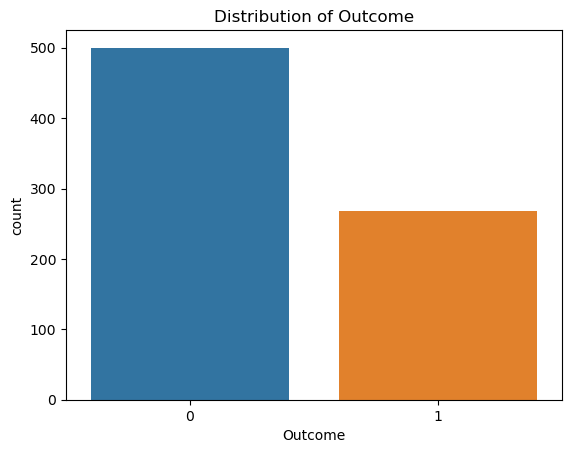

In [4]:
# distribution of outcome variable
# 0 represents 'Not diabetic' and 1 represents 'Diabetic'

ax = sns.countplot(x='Outcome',data=data)
ax.set_title("Distribution of Outcome")

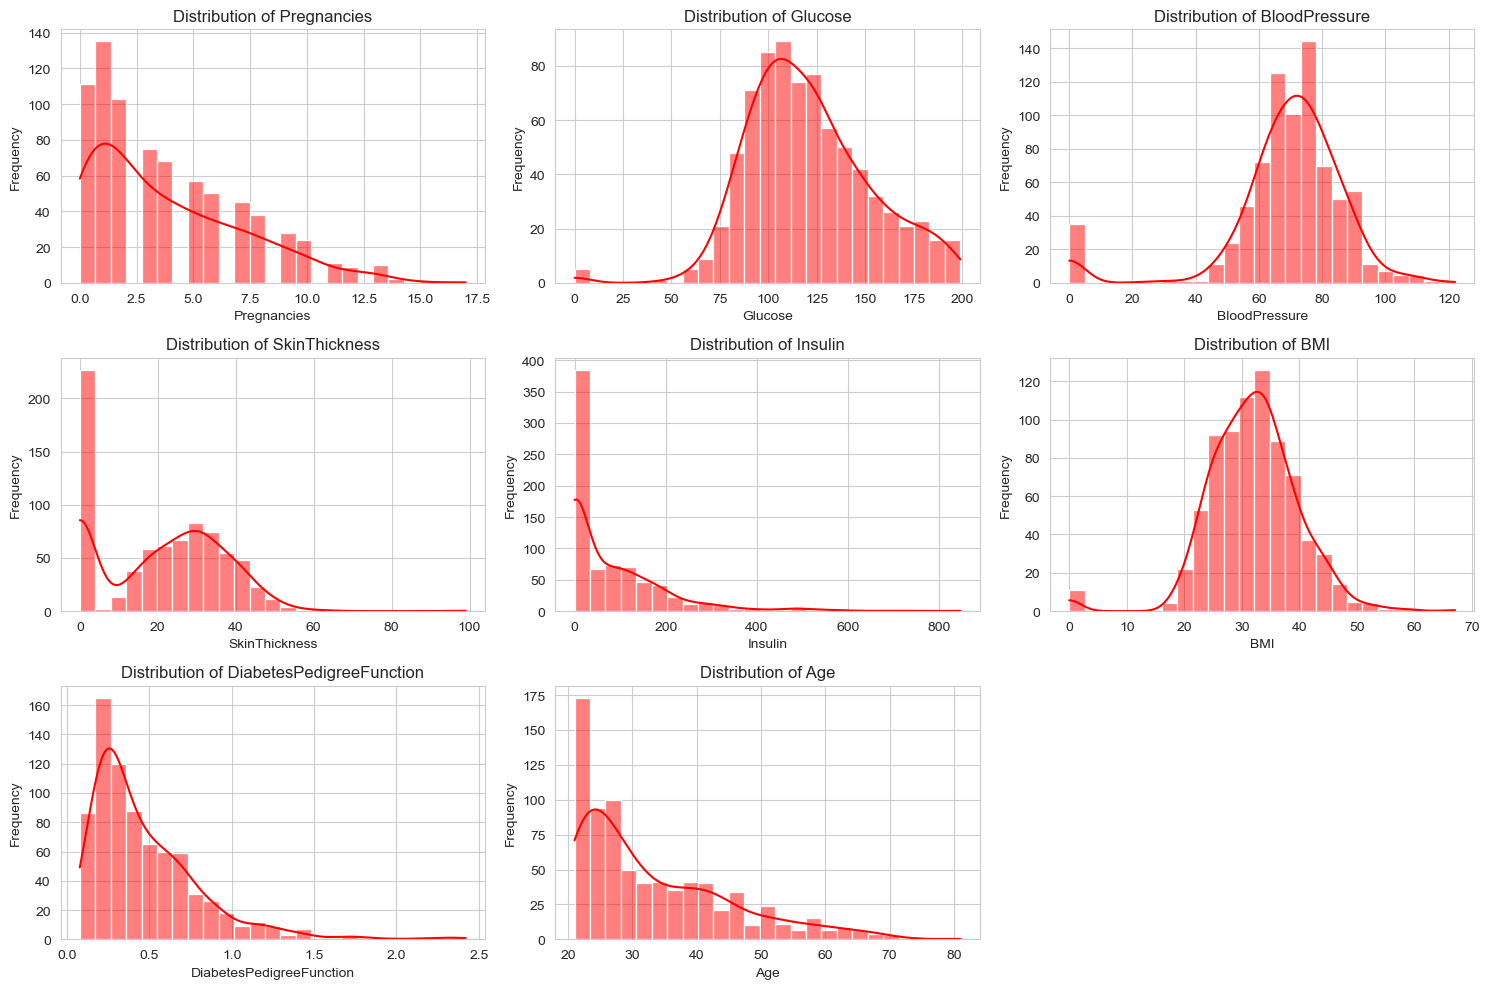

In [5]:
# configuration of visualizations
sns.set_style("whitegrid")

# Distributions of the variables
plt.figure(figsize=(15,10))
for i, col in enumerate(data.columns[:-1],1):
    plt.subplot(3,3,i)
    sns.histplot(data[col], bins=25, kde=True, color='Red')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()    
plt.show()

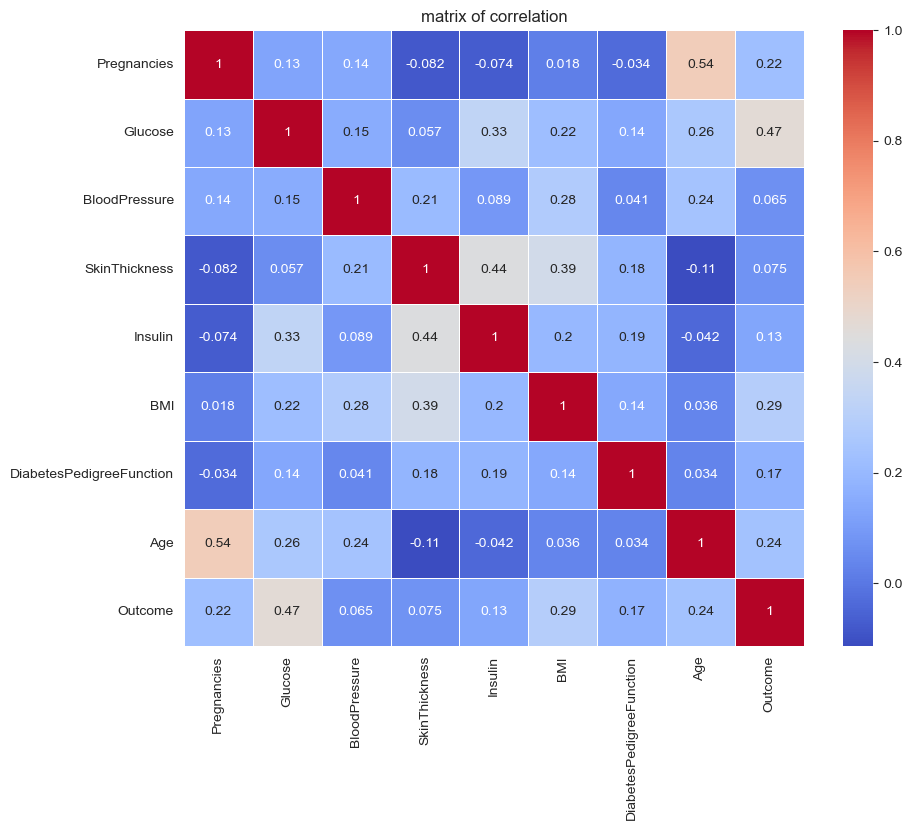

In [6]:
# correlation between variables
plt.figure(figsize=(10,8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot = True, cmap='coolwarm',linewidth=0.5)
plt.title("matrix of correlation")
plt.show()

# 1. Distribution of variables:

   * The variable Pregnancies shows a right-skewed distribution, indicating that the majority of women in the dataset have a low      to moderate number of pregnancies.
   * The Glucose variable appears to have a small number of values set to 0, which may not be realistic and may require further      review.
   * The variables BloodPressure, SkinThickness and Insulin also have values of 0. We must decide if these values are realistic      or if they represent missing data.
   * The Age variable is skewed to the right, indicating that the majority of women in the data set are young.
# 2. Correlation between variables:

   * The correlation matrix shows that the variables are related to each other. A value close to 1 or -1 indicates a strong          positive or negative correlation respectively.
   * It can be seen that the variables 'Glucose','BMI' and 'Age' have a moderate correlation with 'Outcome', indicating they          might be important factors in predicting diabetes.
   
Given this analysis, the next steps include:
* Decide how to handle values of 0 for Glucose, BloodPressure, SkinThickness and Insulin.
* Standardize or Normalize the characteristics since they have different ranges and units.
* split the data set into training and testing sets.
* Train a classification model.

# Data Preprocessing:-
1) First we will replace the 0 values in the variables 'Glucose', 'Insulin', 'SkinThickness', 'BloodPressure' with the median of each column.

2) Standardization: this involves normalizing, standardizing the data and handling any irregularity in the data.

In [7]:
# Defining columns that have values of 0 that must be replaced.
columns_with_zeros = ['Glucose','Insulin','SkinThickness','BloodPressure']

# first replacing 0 values with NaN
for col in columns_with_zeros:
    data[col] = data[col].replace(0,np.nan)
    
# Replacing the NaN with the median of each column
for col in columns_with_zeros:
    data[col].fillna(data[col].median(), inplace=True)
    
# Checking if NaN values exist
null_values = data.isnull().sum()

null_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# defining Dependent and independent variables
X = data.drop(columns=['Outcome'], axis=1)
Y = data['Outcome']

# Splitting the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=25)

# Standardization of features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

x_train_scaled.shape, x_test_scaled.shape

((614, 8), (154, 8))

1) The training data contains 614 records and 8 variables.

2) The testing data contains 154 records and 8 variables.

The next step is to train a classification model. for this purpose we will start by Logistic Regression which is a good model for binary classification problems.

In [9]:
# Creating and training the logistic Regression model
model = LogisticRegression(solver = 'lbfgs',max_iter = 400,random_state=25)
model.fit(x_train_scaled,y_train)

# Predictions on the test set
y_pred = model.predict(x_test_scaled)

# model evaluation
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print(accuracy,'\n',conf_matrix,'\n',class_report)

0.8116883116883117 
 [[92 11]
 [18 33]] 
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       103
           1       0.75      0.65      0.69        51

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.81      0.81      0.81       154



## Accuracy: 81.16 %
  * This means that the model correctly predicted the outcome in approximately 81.16 % of the cases in the test set.
  
## Confusion matrix:
  * True Positives(TP):33
  * True Negatives(TN):92
  * False Positives(FP):11
  * False Negatives(FN):18
  
## Classification Report:
  * The Precision for Class 0 (without diabetes) is 84 % and for Class 1 (with diabetes) is 75 %.
  * The recall for class 0 is 89 % and for class 1 is 65 %.

In [10]:
# making another model on Random Forest Classifier

rf = RandomForestClassifier(random_state=25)
rf.fit(x_train_scaled,y_train)

# predictions on the test set
y_pred = rf.predict(x_test_scaled)

# model evaluation
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print(accuracy,'\n',conf_matrix,'\n',class_report)

0.7987012987012987 
 [[89 14]
 [17 34]] 
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       103
           1       0.71      0.67      0.69        51

    accuracy                           0.80       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



## Accuracy: 79.87 %
  * This means that the model correctly predicted the outcome in approximately 79.87 % of the cases in the test set.
  
## Confusion matrix:
  * True Positives(TP):34
  * True Negatives(TN):89
  * False Positives(FP):14
  * False Negatives(FN):17
  
## Classification Report:
  * The Precision for Class 0 (without diabetes) is 84 % and for Class 1 (with diabetes) is 71 %.
  * The recall for class 0 is 86 % and for class 1 is 67 %.
  
The Random forest model showed similiar performance to that of Logistic Regression.

### We are going to simplify the study, using a decision tree

In [11]:
# Train the model
dt = DecisionTreeClassifier(random_state=25)
dt.fit(x_train_scaled,y_train)

# model evaluation
y_pred = dt.predict(x_test_scaled)
accuracy = accuracy_score(y_test,y_pred)
conf_matrix = confusion_matrix(y_test,y_pred)
class_report = classification_report(y_test,y_pred)

print("Accuracy:",accuracy)
print("Classification Report:", class_report)

# Importance of features
feature_importance = dt.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f'Feature: {feature}, Importance: {importance}')

Accuracy: 0.7207792207792207
Classification Report:               precision    recall  f1-score   support

           0       0.81      0.77      0.79       103
           1       0.57      0.63      0.60        51

    accuracy                           0.72       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.73      0.72      0.72       154

Feature: Pregnancies, Importance: 0.07403197805483921
Feature: Glucose, Importance: 0.3354630340485005
Feature: BloodPressure, Importance: 0.09464838114278859
Feature: SkinThickness, Importance: 0.05994003667713843
Feature: Insulin, Importance: 0.054283306036198166
Feature: BMI, Importance: 0.1596675654674255
Feature: DiabetesPedigreeFunction, Importance: 0.13362690795424062
Feature: Age, Importance: 0.0883387906188691


1. Accuracy: The accuracy of the Decision tree model is 72.07%, this accuracy is low as compared to other model that we                       created previously but still is quite comparable. 

2. Importance of Features:
   The most important features for prediction of Diabetes are in the order as Glucose > BMI > DiabetesPedigreeFunction >            BloodPressure > Age > Pregnancies > SkinThickness > Insulin